In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sal = pd.read_csv('C:\\Users\\weard\\Downloads\\Python\\MLB\\Salaries.csv')

In [32]:
TF = pd.read_csv('C:\\Users\\weard\\Downloads\\Python\\MLB\\TeamsFranchises.csv')

In [98]:
HOF = pd.read_csv('C:\\Users\\weard\\Downloads\\Python\\MLB\\HallofFame.csv')

In [3]:
sal.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [33]:
TF.head()

,franchID,franchName,active,NAassoc
0,ALT,Altoona Mountain City,N,NaN
1,ANA,Los Angeles Angels of Anaheim,Y,NaN
2,ARI,Arizona Diamondbacks,Y,NaN
3,ATH,Philadelphia Athletics,N,PNA
4,ATL,Atlanta Braves,Y,BNA


In [5]:
sal2 = sal.set_index(['yearID','teamID'])

In [6]:
sal2

lgID   playerID    salary
yearID teamID                          
1985   ATL      NL  barkele01    870000
       ATL      NL  bedrost01    550000
       ATL      NL  benedbr01    545000
       ATL      NL   campri01    633333
       ATL      NL  ceronri01    625000
...            ...        ...       ...
2016   WAS      NL  strasst01  10400000
       WAS      NL  taylomi02    524000
       WAS      NL  treinbl01    524900
       WAS      NL  werthja01  21733615
       WAS      NL  zimmery01  14000000

[26428 rows x 3 columns]

In [7]:
sal3 = sal.groupby(['yearID','teamID']).salary.agg(['sum']).nlargest(5,'sum')
sal3

sum
yearID teamID           
2013   NYA     231978886
       LAN     223362196
2016   NYA     222997792
       LAN     221288380
2014   LAN     217014600

In [8]:
sal.loc[sal["salary"] >=25000000].head()

,yearID,teamID,lgID,playerID,salary
16949,2005,NYA,AL,rodrial01,26000000
19461,2008,NYA,AL,rodrial01,28000000
20286,2009,NYA,AL,rodrial01,33000000
21109,2010,NYA,AL,rodrial01,33000000
21832,2011,LAA,AL,wellsve01,26187500


In [9]:
#pd.merge(old_data,new_data, how = 'inner') - not work with multi level indexes ... just join
#df = old_data.join(new_data) or #multi index
#df = old_data.concat

In [10]:
def good_salary(int):
    if 1000000 <= int["good_salary"] < 5000000:
        int["good_salary"] = 'Fair'
    elif 5000000 <= int["good_salary"] < 10000000:
        int["good_salary"] = 'Better'
    elif 10000000 <= int["good_salary"]:
        int["good_salary"] = 'All-Star'
    return int
# apply with cython

In [12]:
sal.dtypes

yearID       int64
teamID      object
lgID        object
playerID    object
salary       int64
dtype: object

In [13]:
sal.groupby(['yearID']).count()

,teamID,lgID,playerID,salary
yearID,,,,
1985,550,550,550,550
1986,738,738,738,738
1987,627,627,627,627
1988,663,663,663,663
1989,711,711,711,711
1990,867,867,867,867
1991,685,685,685,685
1992,769,769,769,769
1993,923,923,923,923


In [14]:
#multi indexed multi column 

<AxesSubplot:xlabel='yearID', ylabel='sum'>

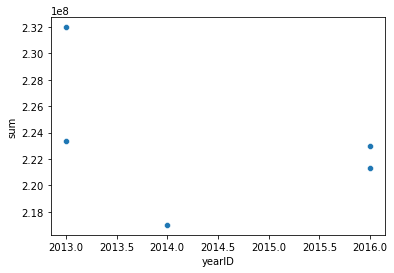

In [15]:
sns.scatterplot(x='yearID', y = 'sum', data = sal3)

# Question 1 - Which year had the highest salary total? 

In [26]:
sal4 = sal.groupby(['yearID']).salary.agg(['sum'])
print(sal4.nlargest(20,'sum'))

               sum
yearID            
2016    3750137392
2015    3514142569
2014    3192317623
2013    3034525648
2012    2932741192
2011    2784505291
2010    2721359865
2008    2684858670
2009    2664726994
2007    2476688987
2006    2321472617
2005    2188713398
2003    2128262128
2004    2070665943
2002    2024077522
2001    1960663313
2000    1666135102
1999    1494228750
1998    1278282871
1997    1127285885


<AxesSubplot:xlabel='yearID', ylabel='sum'>

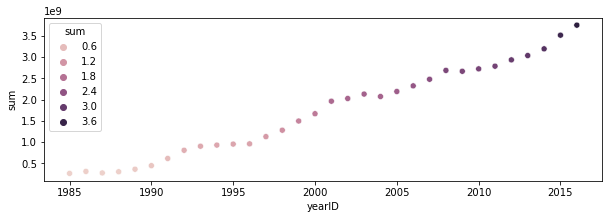

In [17]:
plt.figure(figsize = (10,3))
sns.scatterplot(x='yearID', y = 'sum', data = sal4, hue = 'sum')

In [18]:
sample = sal[(sal['yearID'] == 2000) | (sal['yearID'] == 2001)]
sample
#result[(result['var']>0.25) | (result['var']<-0.25)]

,yearID,teamID,lgID,playerID,salary
12263,2000,ANA,AL,anderga01,3250000
12264,2000,ANA,AL,belchti01,4600000
12265,2000,ANA,AL,botteke01,4000000
12266,2000,ANA,AL,clemeed02,215000
12267,2000,ANA,AL,colanmi01,200000
...,...,...,...,...,...
13954,2001,TOR,AL,simmobr01,225000
13955,2001,TOR,AL,sirotmi01,3000000
13956,2001,TOR,AL,stewash01,2183333
13957,2001,TOR,AL,thompan02,200000


In [23]:
sal.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [4]:
sal.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [27]:
sal2 = sal.sort_values(['salary', 'yearID'], [ascending = False, ascending = True])
print(sal2.head())

SyntaxError: invalid syntax (Temp/ipykernel_12112/2705499073.py, line 1)

In [50]:
salaries = sal

In [62]:
salaries_tf = pd.merge(salaries,TF, left_on = 'teamID', right_on = 'franchID')
salaries_tf

,yearID,teamID,lgID,playerID,salary,franchID,franchName,active,NAassoc
0,1985,ATL,NL,barkele01,870000,ATL,Atlanta Braves,Y,BNA
1,1985,ATL,NL,bedrost01,550000,ATL,Atlanta Braves,Y,BNA
2,1985,ATL,NL,benedbr01,545000,ATL,Atlanta Braves,Y,BNA
3,1985,ATL,NL,campri01,633333,ATL,Atlanta Braves,Y,BNA
4,1985,ATL,NL,ceronri01,625000,ATL,Atlanta Braves,Y,BNA
...,...,...,...,...,...,...,...,...,...
15215,2016,WAS,NL,strasst01,10400000,WAS,Washington Senators,N,NaN
15216,2016,WAS,NL,taylomi02,524000,WAS,Washington Senators,N,NaN
15217,2016,WAS,NL,treinbl01,524900,WAS,Washington Senators,N,NaN
15218,2016,WAS,NL,werthja01,21733615,WAS,Washington Senators,N,NaN


In [51]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [63]:
salaries_tf.isnull().sum()

yearID            0
teamID            0
lgID              0
playerID          0
salary            0
franchID          0
franchName        0
active            0
NAassoc       14305
dtype: int64

# Lambda Expression Practice

In [257]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [320]:
salaries['playerID'].apply(lambda x:x).value_counts()[:20]

moyerja01    25
vizquom01    24
glavito02    23
rodrial01    22
bondsba01    22
thomeji01    22
griffke02    22
smoltjo01    21
francjo01    21
sheffga01    21
johnsra05    21
gordoto01    21
clemero02    21
maddugr01    21
rogerke01    20
oliveda02    20
rhodear01    20
jonesch06    20
rodriiv01    20
hawkila01    20
Name: playerID, dtype: int64

In [307]:
salaries['teamID'].apply(lambda franchise:franchise.split(' ')[0]).value_counts()[:5]

LAN    957
CLE    949
PHI    948
BOS    944
SLN    943
Name: teamID, dtype: int64

In [308]:
salaries['new salary'] = salaries['salary'].apply(lambda num:num * 1.123)
salaries.head()

,yearID,teamID,lgID,playerID,salary,new salary
0,1985,ATL,NL,barkele01,870000,977010.000
1,1985,ATL,NL,bedrost01,550000,617650.000
2,1985,ATL,NL,benedbr01,545000,612035.000
3,1985,ATL,NL,campri01,633333,711232.959
4,1985,ATL,NL,ceronri01,625000,701875.000


In [319]:
salaries['team_lg'] = (lambda x,y: x + '-' + y)(salaries['lgID'], salaries['teamID'])
salaries.head()

,yearID,teamID,lgID,playerID,salary,new salary,team_lg
0,1985,ATL,NL,barkele01,870000,977010.000,NL-ATL
1,1985,ATL,NL,bedrost01,550000,617650.000,NL-ATL
2,1985,ATL,NL,benedbr01,545000,612035.000,NL-ATL
3,1985,ATL,NL,campri01,633333,711232.959,NL-ATL
4,1985,ATL,NL,ceronri01,625000,701875.000,NL-ATL


# Question 2 - Which team paid the most for players and by year?

In [82]:
highest_salary_team = salaries.groupby('teamID').sum('salary')['salary']
print(highest_salary_team.nlargest())

teamID
NYA    3718869083
BOS    2802350096
LAN    2674847083
NYN    2251200033
SFN    2176708366
Name: salary, dtype: int64


In [114]:
highest_salary_team = salaries.groupby(['yearID','teamID']).sum('salary')['salary']
print(highest_salary_team.nlargest(10))

yearID  teamID
2013    NYA       231978886
        LAN       223362196
2016    NYA       222997792
        LAN       221288380
2014    LAN       217014600
2015    LAN       215792000
        NYA       212751957
2005    NYA       208306817
2008    NYA       207896789
2010    NYA       206333389
Name: salary, dtype: int64


# Question 3 - Average value of player year over year

In [92]:
average_player_sal = salaries.groupby('yearID').mean('salary')['salary']
print(average_player_sal.nlargest())

yearID
2016    4.396410e+06
2015    4.301276e+06
2014    3.980446e+06
2013    3.723344e+06
2012    3.458421e+06
Name: salary, dtype: float64


# Question 4 - Highest salary earned in a year

In [112]:
highest_salary_player = salaries.groupby(['yearID','teamID','playerID']).sum('salary')['salary']
print(highest_salary_player.nlargest(10))

yearID  teamID  playerID 
2009    NYA     rodrial01    33000000
2010    NYA     rodrial01    33000000
2016    LAN     kershcl01    33000000
2015    LAN     kershcl01    32571000
2011    NYA     rodrial01    32000000
2016    ARI     greinza01    31799030
2012    NYA     rodrial01    30000000
2016    BOS     priceda01    30000000
2013    NYA     rodrial01    29000000
2008    NYA     rodrial01    28000000
Name: salary, dtype: int64


# Question 4a - Yankee salary compared to team

In [198]:
yankee = salaries[salaries["teamID"] == 'NYA']
yankee_total_sal = yankee.groupby(['yearID', 'teamID']).sum('salary')
yankee_merged = pd.merge(yankee,yankee_total_sal, left_on = 'yearID', right_on = 'yearID')
yankee_merged = yankee_merged.rename(columns = {'salary_x':'salary_player','salary_y':'salary_team'})
yankee_merged['% Salary'] = ((yankee_merged['salary_player'] / yankee_merged['salary_team'])*100)
yankee_merged_10 = yankee_merged.nlargest(10,columns = '% Salary')
yankee_merged_10

,yearID,teamID,lgID,playerID,salary_player,salary_team,% Salary
735,2009,NYA,AL,rodrial01,33000000,201449189,16.381302
759,2010,NYA,AL,rodrial01,33000000,206333389,15.993534
790,2011,NYA,AL,rodrial01,32000000,202275028,15.820045
816,2012,NYA,AL,rodrial01,30000000,196522289,15.265444
372,1997,NYA,AL,fieldce01,9237500,62241545,14.841373
232,1992,NYA,AL,tartada01,5300000,37543334,14.117020
711,2008,NYA,AL,rodrial01,28000000,207896789,13.468221
485,2000,NYA,AL,willibe02,12357143,92338260,13.382473
461,2000,NYA,AL,coneda01,12000000,92338260,12.995696
129,1989,NYA,AL,mattido01,2200000,17114375,12.854691


<AxesSubplot:title={'center':'Top 10 Players Salaries compared to Team Salaries'}, xlabel='yearID', ylabel='salary_player'>

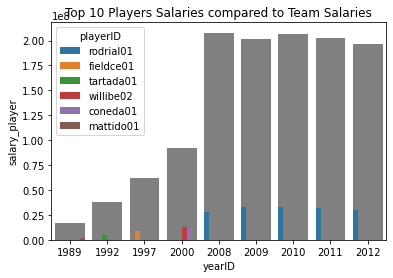

In [256]:
sns.barplot(x = 'yearID', y = 'salary_team',color = "grey",data = yankee_merged_10).set_title('Top 10 Players Salaries compared to Team Salaries')
sns.barplot(x = 'yearID', y = 'salary_player', data = yankee_merged_10, hue = 'playerID')

# Merge salaries and HOF data

In [99]:
merge_salaries = salaries.groupby('playerID').sum('salary')['salary']
merge_salaries

playerID
aardsda01    9259750
aasedo01     2300000
abadan01      327000
abadfe01     3766400
abbotje01     985000
              ...   
zumayjo01    4207000
zuninmi01    1027600
zupcibo01     431000
zuvelpa01     145000
zychto01      511000
Name: salary, Length: 5149, dtype: int64

In [101]:
merged_sal_hof = pd.merge(merge_salaries, HOF, on = 'playerID')
merged_sal_hof

,playerID,salary,yearID,votedBy,ballots,needed,votes,inducted,category,needed_note
0,abbotji01,12960500,2005,BBWAA,516.0,387.0,13.0,N,Player,NaN
1,aguilri01,32587999,2006,BBWAA,520.0,390.0,3.0,N,Player,NaN
2,alexado01,3725000,1995,BBWAA,460.0,345.0,0.0,N,Player,NaN
3,alomaro01,76603815,2010,BBWAA,539.0,405.0,397.0,N,Player,NaN
4,alomaro01,76603815,2011,BBWAA,581.0,436.0,523.0,Y,Player,NaN
...,...,...,...,...,...,...,...,...,...,...
775,yountro01,17700000,1999,BBWAA,497.0,373.0,385.0,Y,Player,NaN
776,zahnge01,550000,1991,BBWAA,443.0,333.0,0.0,N,Player,NaN
777,zambrca01,114950000,2018,BBWAA,422.0,317.0,0.0,N,Player,NaN
778,zeileto01,40767999,2010,BBWAA,539.0,405.0,0.0,N,Player,NaN


# Yankee vs Red Sox Salary Comparison

C:\Users\weard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weard\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\weard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\weard\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in fav

<AxesSubplot:xlabel='yearID', ylabel='salary'>

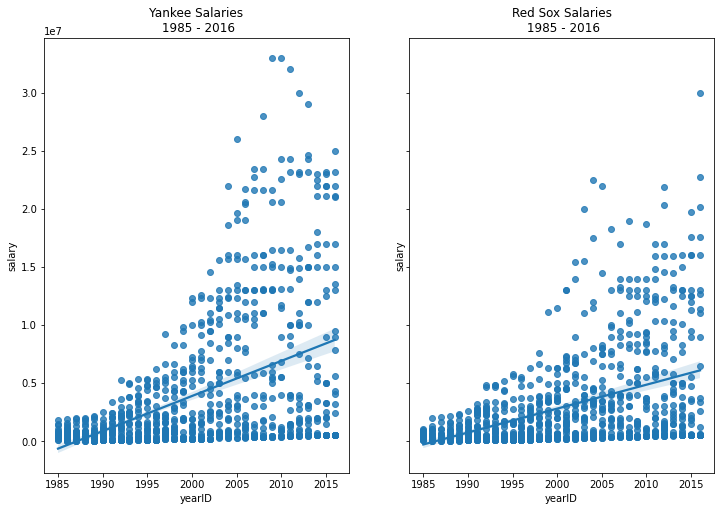

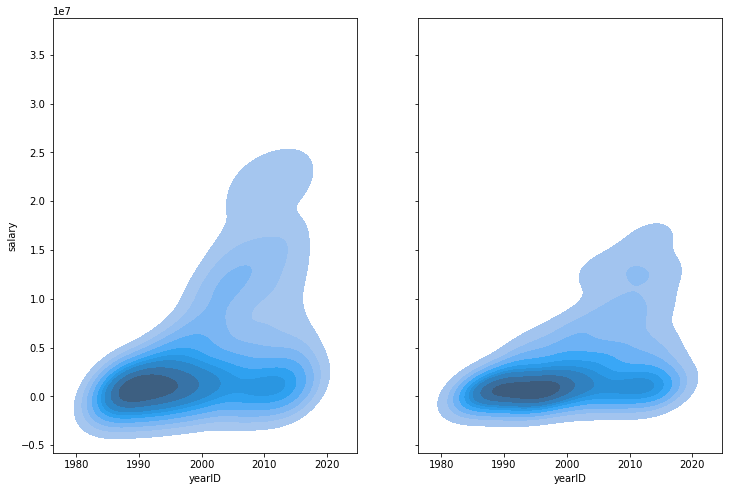

In [344]:
# Respective Salaries
yankee = salaries[salaries["teamID"] == 'NYA']
redsox = salaries[salaries["teamID"] == 'BOS']

# Create figure with scatter plots

fig1, axs1 = plt.subplots(ncols = 2, figsize = (12,8),sharex = True, sharey = True)
sns.regplot(x = 'yearID', y = 'salary', data = yankee, ax = axs1[0]).set_title('Yankee Salaries\n 1985 - 2016')
sns.regplot(x = 'yearID', y = 'salary', data = redsox, ax = axs1[1]).set_title('Red Sox Salaries\n 1985 - 2016')

# Create kde plots
fig2, axs2 = plt.subplots(ncols = 2, figsize = (12,8), sharex = True, sharey = True)
sns.kdeplot(yankee.yearID, yankee.salary, shade = True, shade_lowest = False, ax = axs2[0])
sns.kdeplot(redsox.yearID, redsox.salary, shade = True, shade_lowest = False, ax = axs2[1])


In [364]:
conditions = [
    (yankee['yearID'] <= 1990), 
    (yankee['yearID'] >= 1991) & (yankee['yearID'] <=2000),
    (yankee['yearID'] >= 2001) & (yankee['yearID'] <=2010),
    (yankee['yearID'] >= 2011) & (yankee['yearID'] <=2020)
    ]
values = ['1985-1990','1991-2000','2001-2010','2011-2020']
yankee['salary_year'] = np.select(conditions,values)

C:\Users\weard\AppData\Local\Temp/ipykernel_12112/1168003308.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yankee['salary_year'] = np.select(conditions,values)


,yearID,teamID,lgID,playerID,salary,new salary,team_lg,salary_year
325,1985,NYA,AL,baylodo01,810000,909630.0,AL-NYA,1985-1990
326,1985,NYA,AL,berrada01,477500,536232.5,AL-NYA,1985-1990
327,1985,NYA,AL,bystrma01,250000,280750.0,AL-NYA,1985-1990
328,1985,NYA,AL,cowlejo01,120000,134760.0,AL-NYA,1985-1990
329,1985,NYA,AL,griffke01,1075000,1207225.0,AL-NYA,1985-1990


# Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [158]:
salary_only = salaries['salary']
salary_only_reshape = salary_only.to_numpy()
salary_only_reshape1 = salary_only_reshape.reshape(-1,1)
print(salary_only_reshape1.shape)

(26428, 1)


In [159]:
regr = regr.fit(salary_only_reshape1,salaries['salary'])

In [161]:
regr_int = regr.intercept_
regr_coef = regr.coef_[[0]][0]

In [162]:
print(regr_int,regr_coef)

1.3969838619232178e-09 0.9999999999999993


# Linear Regression - Salaries

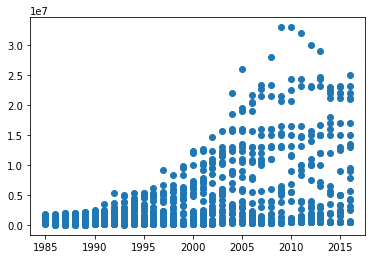

In [179]:
plt.scatter(x = 'yearID', y = 'salary', data = yankee)

In [180]:
reg = LinearRegression

prediction_space = np.linspace(min())






# Linear Regression Test - HOF data Inducted vs Salaries

In [175]:
inducted_dummies = pd.get_dummies(merged_sal_hof['inducted'])
inducted_dummies

,N,Y
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
775,0,1
776,1,0
777,1,0
778,1,0


In [177]:
reg1 = LinearRegression()
reg1 = reg1.fit(inducted_dummies, merged_sal_hof['salary'])

LinearRegression()